In [132]:
%matplotlib inline

from matplotlib import pyplot as plt
from scipy.integrate import odeint
import numpy as np

In [133]:
Data_List = np.loadtxt('Planetary_Data.txt', delimiter = ',')
Data_Array = np.array(Data_List)

rx     = Data_Array[:,0] #Initial x position coordinate of each body
ry     = Data_Array[:,1] #Initial y position coordinate of each body
rz     = Data_Array[:,2] #Initial z position coordinate of each body
vx     = Data_Array[:,3] #Initial x velocity coordinate of each body

vy     = Data_Array[:,4] #Initial y velocity coordinate of each body
vz     = Data_Array[:,5] #Initial z velocity coordinate of each body
Mratio = Data_Array[:,6] #The ratio of the mass of the Sun and body n. (Msun)/(Mn)
Mratio[9]=1.35E9

In [134]:
Radii = np.zeros([10,10])

for j in range(0,10):
        for i in range (0,10):
            #if i == j: 
                #continue
                
            Radii[i,j] = np.sqrt((rx[i]-rx[j])**2+(ry[i]-ry[j])**2+(rz[i]-rz[j])**2)#The distance between two bodies at time t = 0 in AU
#             radii.append(r)
            
Number_of_bodies = len(rx)

# Radii = np.reshape(radii, ((Number_of_bodies),(Number_of_bodies )))
print(Radii)
#Each row is the distance between one body and every other body, eg the first row is the distance between the Sun and every planet

# Radii[0,:] Selecting the first row

[[  0.           0.46625901   0.72016035   0.98331698   1.39095065
    4.96531583   9.18395696  19.92397226  30.12060856  30.22307644]
 [  0.46625901   0.           0.71812878   1.4131314    1.58845775
    5.34787952   9.60104565  19.72404556  29.83315879  29.77119169]
 [  0.72016035   0.71812878   0.           1.13441357   2.11035319
    5.57382318   9.71599048  20.43587818  30.50894624  29.96693616]
 [  0.98331698   1.4131314    1.13441357   0.           1.84690411
    4.61340611   8.64560842  20.72219386  31.02110339  31.06833075]
 [  1.39095065   1.58845775   2.11035319   1.84690411   0.           3.94624969
    8.28913852  18.92560423  29.34958888  30.69306434]
 [  4.96531583   5.34787952   5.57382318   4.61340611   3.94624969   0.
    4.36490349  19.66378589  30.72545265  34.38744937]
 [  9.18395696   9.60104565   9.71599048   8.64560842   8.28913852
    4.36490349   0.          21.83137499  33.23447365  38.6775179 ]
 [ 19.92397226  19.72404556  20.43587818  20.72219386  18.92560

In [135]:
Velocity_x = np.array(vx)
Velocity_y = np.array(vy)
Velocity_z = np.array(vz)

print(Velocity_x) #x velocity of each body
print(Velocity_y) #y velocity of each body
print(Velocity_z) #z velocity of each body

[  5.37426141e-06   2.11742456e-02   5.18907060e-04  -1.72246362e-02
   7.53301337e-04  -4.55837695e-03  -4.28516469e-03   2.68385820e-03
   2.58459114e-03   3.04134897e-03]
[ -7.41096674e-06  -7.10538613e-03  -2.03135526e-02  -3.02068484e-03
   1.51788877e-02   6.43986304e-03   3.88457903e-03   2.66501430e-03
   1.76894147e-03  -1.53962424e-03]
[ -9.42288937e-08  -2.52292584e-03  -3.07268621e-04  -7.00338913e-08
   2.99658880e-04   7.53760202e-05   1.02516007e-04  -2.48407443e-05
  -9.62932102e-05  -7.15681025e-04]


In [136]:
# Ax=np.zeros([10])
# Ay=np.zeros([10])
# Az=np.zeros([10])
# GM = (0.01720209895)**2
# for la in range(0,10):
#     for qw in range(0,10):
#         if qw==la:
#             continue
        
#         Ax[qw] += -(GM / Mratio[la])*(rx[la]-rx[qw])/((Radii[qw,la])**3)
#         Ay[qw] += -(GM / Mratio[la])*(ry[la]-ry[qw])/((Radii[qw,la])**3)
#         Az[qw] += -(GM / Mratio[la])*(rz[la]-rz[qw])/((Radii[qw,la])**3)

In [137]:
X = np.zeros(60)

X[0:10] = rx
X[10:20] = ry
X[20:30] =  rz
X[30:40] = vx
X[40:50] =  vy
X[50:60] = vz

# print(np.reshape(X,[6,10]))
# print(np.reshape(np.reshape(X,[6,10]),[60],order='C'))

In [142]:
GM = (0.01720209895)**2

def grav(X, t, masses):
    dX = np.zeros(60)
    
    dX[0:10] = X[30:40]
    dX[10:20] = X[40:50]
    dX[20:30] =  X[50:60]
    X=np.reshape(X,[6,10])

    
    GM = (0.01720209895)**2
    
    
    for j in range(0,10):
        for i in range (0,10):
            #if i == j: 
                #continue
                
            Radii[i,j] = np.sqrt((X[0,i]-X[0,j])**2+(X[1,i]-X[1,j])**2+(X[2,i]-X[2,j])**2)
    
#     print(Radii)
    ax=np.zeros([10])
    ay=np.zeros([10])
    az=np.zeros([10])
    for la in range(0,10):
        for qw in range(0,10):
            if qw!=la:
        
                ax[qw] += (GM / Mratio[la])*(X[0,la]-X[0,qw])/((Radii[qw,la])**3)
                ay[qw] += (GM / Mratio[la])*(X[1,la]-X[1,qw])/((Radii[qw,la])**3)
                az[qw] += (GM / Mratio[la])*(X[2,la]-X[2,qw])/((Radii[qw,la])**3)
    
    dX[30:40] = ax
    dX[40:50] = ay
    dX[50:60] = az

    return dX

In [147]:
times = np.arange(0., 36500.,10) # ten years 

dx, infodict = odeint(grav,X,times, args=(GM,), full_output=True)


from mpl_toolkits.mplot3d import Axes3D


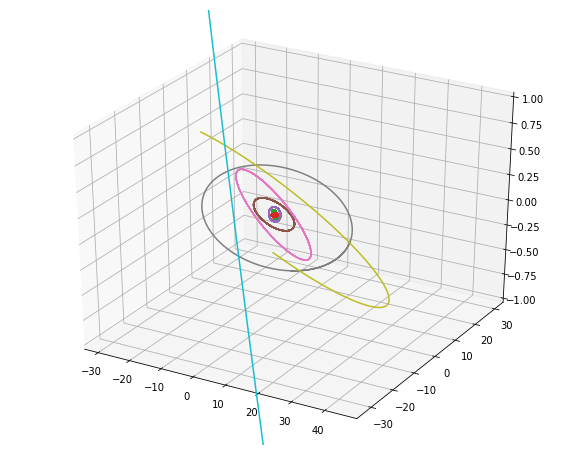

In [148]:

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

for h in range (0,10):
    ax.plot(dx[:,h], dx[:,h + 10], dx[:,h + 20])
    ax.set_zlim([-1,1])

In [149]:
print(Mratio)

[  1.00000000e+00   6.02360000e+06   4.08523710e+05   3.28900560e+05
   3.09870800e+06   1.04734860e+03   3.49789800e+03   2.29029800e+04
   1.94122400e+04   1.35000000e+09]
